In [2]:
# !pip install vaderSentiment

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # sentiment analysis with Vader
import re # regex for cleaning the tweets
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/xander/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read csv file into a pandas dataframe
df = pd.read_csv('FTTH.csv')

In [3]:
# Viewing number of observations and variables in the dataset
df.shape

(4688, 22)

In [4]:
# Viewing the dataset that contains the entire csv file
df

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,Kinyua_Ngugi,Kinyua Ngugi,825938918,1158069844887187457,/Kinyua_Ngugi/status/1158069844887187457,2019-08-04 17:39:01,1564940341,@Safaricom_Care. I have not being able to acce...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
1,1,MullaJames,james mulla,2991661769,1158019548643282944,/MullaJames/status/1158019548643282944,2019-08-04 14:19:10,1564928350,@SafaricomPLC poor customer care ever from Thu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
2,2,VMageka,Vivy :),490216188,1157969000489504768,/VMageka/status/1157969000489504768,2019-08-04 10:58:18,1564916298,@Safaricom_Care Hi my home fibre hasnt been wo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
3,3,sackie84,Isaac,122393420,1157961337118625792,/sackie84/status/1157961337118625792,2019-08-04 10:27:51,1564914471,@Safaricom_Care I activated my fibre home toda...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
4,4,KarwithaME,Ka Rwitha,724505742,1157944737149706240,/KarwithaME/status/1157944737149706240,2019-08-04 09:21:53,1564910513,@Safaricom_Care . What charges have you added ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EBHYmbzXkAIoecC....,NaN,0,0,1,True,False,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,4683,riopiyo,Sir Richard Duke of UK (Uyoma Katwenga),84088672,1202270147412660228,/riopiyo/status/1202270147412660228,2019-12-04 16:55:14,1575478514,@Safaricom_Care please send a technician to co...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,0,False,False,NaN,[]
4684,4684,KenyanBern,Kenyanbern: Microbiologist,855016101843005440,1202222783310319617,/KenyanBern/status/1202222783310319617,2019-12-04 13:47:02,1575467222,Hi @Safaricom_Care I called 2 days ago request...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
4685,4685,JeffMgg,Geoffrey_M,493550243,1202215227934334976,/JeffMgg/status/1202215227934334976,2019-12-04 13:17:01,1575465421,@Safaricom_Care I have been requesting to be c...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EK8gRzHX0AUaAuL....,NaN,0,0,2,True,False,NaN,[]
4686,4686,mikemunyi,DΣXƬΣЯ,18046438,1202187573998829569,/mikemunyi/status/1202187573998829569,2019-12-04 11:27:07,1575458827,@Safaricom_Care Good afternoon guys. Home fibr...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]


In [5]:
# Quick look at the first few rows
display(df.head())

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,Kinyua_Ngugi,Kinyua Ngugi,825938918,1158069844887187457,/Kinyua_Ngugi/status/1158069844887187457,2019-08-04 17:39:01,1564940341,@Safaricom_Care. I have not being able to acce...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
1,1,MullaJames,james mulla,2991661769,1158019548643282944,/MullaJames/status/1158019548643282944,2019-08-04 14:19:10,1564928350,@SafaricomPLC poor customer care ever from Thu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
2,2,VMageka,Vivy :),490216188,1157969000489504768,/VMageka/status/1157969000489504768,2019-08-04 10:58:18,1564916298,@Safaricom_Care Hi my home fibre hasnt been wo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
3,3,sackie84,Isaac,122393420,1157961337118625792,/sackie84/status/1157961337118625792,2019-08-04 10:27:51,1564914471,@Safaricom_Care I activated my fibre home toda...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,0,0,1,True,False,NaN,[]
4,4,KarwithaME,Ka Rwitha,724505742,1157944737149706240,/KarwithaME/status/1157944737149706240,2019-08-04 09:21:53,1564910513,@Safaricom_Care . What charges have you added ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,True,['https://pbs.twimg.com/media/EBHYmbzXkAIoecC....,NaN,0,0,1,True,False,NaN,[]


In [6]:
# summarize the dataset
print(df.describe())

        Unnamed: 0       user_id      tweet_id  timestamp_epochs  video_url  \
count  4688.000000  4.688000e+03  4.688000e+03      4.688000e+03        0.0   
mean   2343.500000  1.479866e+17  1.168797e+18      1.567498e+09        NaN   
std    1353.453361  3.471991e+17  5.107434e+16      1.217707e+07        NaN   
min       0.000000  7.674792e+06  1.079923e+18      1.546309e+09        NaN   
25%    1171.750000  2.299376e+08  1.123808e+18      1.556772e+09        NaN   
50%    2343.500000  4.602445e+08  1.170273e+18      1.567850e+09        NaN   
75%    3515.250000  2.499885e+09  1.212768e+18      1.577981e+09        NaN   
max    4687.000000  1.251855e+18  1.254479e+18      1.587926e+09        NaN   

             likes     retweets      replies  parent_tweet_id  
count  4688.000000  4688.000000  4688.000000     7.990000e+02  
mean      1.196886     0.320606     0.963097     1.169289e+18  
std      15.029629     3.390367     1.720657     5.496986e+16  
min       0.000000     0.000000 

In [7]:
# Getting the independent variable (tweets to be analysed). 
# It falls on the 8th index under variable name text
# option 1:
tweets = df.iloc[:, 8].values
df = pd.DataFrame(tweets)

# Option 2:
# df = df[['text']]

In [8]:
# Viewing the df that has the tweets to be analysed
df

,0
0,@Safaricom_Care. I have not being able to acce...
1,@SafaricomPLC poor customer care ever from Thu...
2,@Safaricom_Care Hi my home fibre hasnt been wo...
3,@Safaricom_Care I activated my fibre home toda...
4,@Safaricom_Care . What charges have you added ...
...,...
4683,@Safaricom_Care please send a technician to co...
4684,Hi @Safaricom_Care I called 2 days ago request...
4685,@Safaricom_Care I have been requesting to be c...
4686,@Safaricom_Care Good afternoon guys. Home fibr...


In [9]:
# Looking at the Target variable for missing values
df[0].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4683    False
4684    False
4685    False
4686    False
4687    False
Name: 0, Length: 4688, dtype: bool

In [10]:
# Total missing values for the target variable
df[0].isnull().sum()

0

In [11]:
# Saving the df to a new variable
df_vader = df
df_vader

,0
0,@Safaricom_Care. I have not being able to acce...
1,@SafaricomPLC poor customer care ever from Thu...
2,@Safaricom_Care Hi my home fibre hasnt been wo...
3,@Safaricom_Care I activated my fibre home toda...
4,@Safaricom_Care . What charges have you added ...
...,...
4683,@Safaricom_Care please send a technician to co...
4684,Hi @Safaricom_Care I called 2 days ago request...
4685,@Safaricom_Care I have been requesting to be c...
4686,@Safaricom_Care Good afternoon guys. Home fibr...


In [12]:
# Sentiment Analysis with vader

# This gets the polarity of the unlabelled sentiments using Vader
# creating a new Series of data that contains the sentiment of our tweet’s text.
# This is then concatenated  to the original dataframe
# overall polarity threshold value is saved under variable "compound."
# compound score is used as a threshold value for the analysis of the text data. 

analyzer = SentimentIntensityAnalyzer()
sentiment = df_vader[0].apply(lambda x: analyzer.polarity_scores(x))
df_vader = pd.concat([df,sentiment.apply(pd.Series)],1)
df_vader

,0,neg,neu,pos,compound
0,@Safaricom_Care. I have not being able to acce...,0.000,1.000,0.000,0.0000
1,@SafaricomPLC poor customer care ever from Thu...,0.088,0.822,0.091,0.0258
2,@Safaricom_Care Hi my home fibre hasnt been wo...,0.229,0.771,0.000,-0.4874
3,@Safaricom_Care I activated my fibre home toda...,0.000,0.917,0.083,0.3818
4,@Safaricom_Care . What charges have you added ...,0.048,0.777,0.175,0.6767
...,...,...,...,...,...
4683,@Safaricom_Care please send a technician to co...,0.090,0.816,0.094,0.0258
4684,Hi @Safaricom_Care I called 2 days ago request...,0.000,0.838,0.162,0.4404
4685,@Safaricom_Care I have been requesting to be c...,0.061,0.850,0.089,0.1901
4686,@Safaricom_Care Good afternoon guys. Home fibr...,0.000,0.838,0.162,0.4404


In [13]:
# Function to check compound score and assign new values (-1: negative, 0: neutral & 1 - positive) to "analysis" variable
# Positive sentiment: compound score >= 0.05
# Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# Negative sentiment: compound score <= -0.05

def ratio(x):
    if x >= 0.05:
        return 1
    elif x > -0.05 and x < 0.05:
        return 0
    else:
        return -1
df_vader['analysis'] = df_vader['compound'].apply(ratio)
df_vader

,0,neg,neu,pos,compound,analysis
0,@Safaricom_Care. I have not being able to acce...,0.000,1.000,0.000,0.0000,0
1,@SafaricomPLC poor customer care ever from Thu...,0.088,0.822,0.091,0.0258,0
2,@Safaricom_Care Hi my home fibre hasnt been wo...,0.229,0.771,0.000,-0.4874,-1
3,@Safaricom_Care I activated my fibre home toda...,0.000,0.917,0.083,0.3818,1
4,@Safaricom_Care . What charges have you added ...,0.048,0.777,0.175,0.6767,1
...,...,...,...,...,...,...
4683,@Safaricom_Care please send a technician to co...,0.090,0.816,0.094,0.0258,0
4684,Hi @Safaricom_Care I called 2 days ago request...,0.000,0.838,0.162,0.4404,1
4685,@Safaricom_Care I have been requesting to be c...,0.061,0.850,0.089,0.1901,1
4686,@Safaricom_Care Good afternoon guys. Home fibr...,0.000,0.838,0.162,0.4404,1


In [14]:
# Getting the total count of the polarities from vader
df_vader['analysis'].value_counts()

 1    1723
 0    1510
-1    1455
Name: analysis, dtype: int64

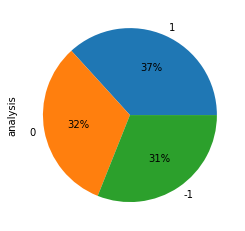

In [15]:
# Plotting the Vader results with a pie chart
df_vader['analysis'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.show()

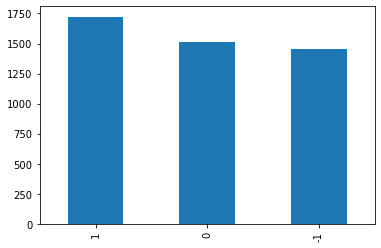

In [16]:
# Plotting the vader polarity results
df_vader['analysis'].value_counts().plot(kind = 'bar')
plt.show()

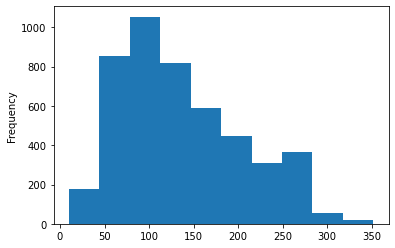

In [17]:
# Visualizing the length of the text
df_vader[0].str.len().plot.hist()

In [18]:
# Data Pre-processing
# Removing the company's twitter handles as they do not add any value
df_vader[0] = df_vader[0].str.replace('@Safaricom_Care','')
df_vader[0] = df_vader[0].str.replace('@SafaricomPLC','')
df_vader

,0,neg,neu,pos,compound,analysis
0,. I have not being able to access home fibre f...,0.000,1.000,0.000,0.0000,0
1,poor customer care ever from Thursday i gave ...,0.088,0.822,0.091,0.0258,0
2,Hi my home fibre hasnt been working since yes...,0.229,0.771,0.000,-0.4874,-1
3,I activated my fibre home today. When I check...,0.000,0.917,0.083,0.3818,1
4,. What charges have you added to your home ne...,0.048,0.777,0.175,0.6767,1
...,...,...,...,...,...,...
4683,please send a technician to come repair our h...,0.090,0.816,0.094,0.0258,0
4684,Hi I called 2 days ago requesting for Home fi...,0.000,0.838,0.162,0.4404,1
4685,I have been requesting to be connected since ...,0.061,0.850,0.089,0.1901,1
4686,Good afternoon guys. Home fibre account 11159...,0.000,0.838,0.162,0.4404,1


In [19]:
# Cleaning the tweets
# Creating a function called clean that is later applied to df_vader.
# removing hyperlink, #, RT, @mentions

corpus = []

def clean(x):
    x = re.sub(r'^RT[\s]+', '', x)
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
    x = re.sub(r'#', '', x)
    x = re.sub(r'@[A-Za-z0–9]+', '', x)
    x = x.lower() # text transform. Changing all uppercase letters to lowercase letters.
    x = x.split() # splitting each tweet sentiment into its individual words before stemming.
    ps = PorterStemmer() # calling the stemming function and assigning it to a variable 'ps'
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove('no')
    all_stopwords.remove('don')
    all_stopwords.remove("don't")
    all_stopwords.remove('aren')
    all_stopwords.remove("aren't")
    all_stopwords.remove('couldn')
    all_stopwords.remove("couldn't")
    all_stopwords.remove('didn')
    all_stopwords.remove("didn't")
    all_stopwords.remove("doesn't")
    all_stopwords.remove('doesn')
    all_stopwords.remove('hadn')
    all_stopwords.remove("hadn't")
    all_stopwords.remove('hasn')
    all_stopwords.remove("hasn't")
    all_stopwords.remove('haven')
    all_stopwords.remove("haven't")
    all_stopwords.remove('isn')
    all_stopwords.remove("isn't")
    all_stopwords.remove('mightn')
    all_stopwords.remove("mightn't")
    all_stopwords.remove('mustn')
    all_stopwords.remove("mustn't")
    all_stopwords.remove('needn')
    all_stopwords.remove("needn't")
    all_stopwords.remove("shan't")
    all_stopwords.remove('shouldn')
    all_stopwords.remove("shouldn't")
    all_stopwords.remove("wasn't")
    all_stopwords.remove("weren't")
    all_stopwords.remove("won't")
    all_stopwords.remove("wouldn't")
    x = [ps.stem(word) for word in x if not word in set(all_stopwords)] # removing all stopwords then stemming all other words.
    x = ' '.join(x) # combining all split words to form the original format of the tweet. 
    corpus.append(x)
    
    return x
df_vader[0] = df_vader[0].apply(clean)

In [20]:
# Checking the new cleaned df
df_vader

,0,neg,neu,pos,compound,analysis
0,. not abl access home fibr past hour,0.000,1.000,0.000,0.0000,0
1,poor custom care ever thursday gave,0.088,0.822,0.091,0.0258,0
2,hi home fibr hasnt work sinc yesterday morn ac...,0.229,0.771,0.000,-0.4874,-1
3,activ fibr home today. check find balanc 0. pl...,0.000,0.917,0.083,0.3818,1
4,. charg ad home net? secur net? 200 for? fibr ...,0.048,0.777,0.175,0.6767,1
...,...,...,...,...,...,...
4683,pleas send technician come repair home fibr co...,0.090,0.816,0.094,0.0258,0
4684,"hi call 2 day ago request home fibr connect , ...",0.000,0.838,0.162,0.4404,1
4685,request connect sinc may vain. apart next us l...,0.061,0.850,0.089,0.1901,1
4686,good afternoon guys. home fibr account 1115904...,0.000,0.838,0.162,0.4404,1


In [21]:
# Representing Text in Numeric Form
# Creating the Bag of Words Model for Vader
# Bag of words takes the most frequent words used and leaves the rest.
# These frequent words are stored in the sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 6660) # matrix of features
x = cv.fit_transform(corpus).toarray() # fit gets all words & transform stores the words in a column
y = df_vader.iloc[:,-1].values

In [22]:
len(x[0]) # gives the number of elements in the first row as a result of tokenization

6660

In [23]:
# Splitting the dataset into Training and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [24]:
# Model training 1: Naive Bayes

# Training the Naive Bayes Model on the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [25]:
# Predicting the Test Result Test
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 0  0]
 [-1 -1]
 [ 0 -1]
 ...
 [ 0  0]
 [-1  1]
 [-1 -1]]


In [26]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

# Niave Bayes accuracy
accuracy_score(y_test, y_pred)

[[273 107  60]
 [ 74 333  42]
 [163 165 190]]
              precision    recall  f1-score   support

          -1       0.54      0.62      0.57       440
           0       0.55      0.74      0.63       449
           1       0.65      0.37      0.47       518

    accuracy                           0.57      1407
   macro avg       0.58      0.58      0.56      1407
weighted avg       0.58      0.57      0.55      1407



0.5657427149964463

In [28]:
# Model Training 2: SVM
# The fit method of SVC class is called to train the algorithm on the training data which is passed as a parameter to the fit method.

from sklearn.svm import SVC
# svclassifier = SVC(kernel='poly', degree=8) # polynomial kernel accuracy: 0.39%
# svclassifier = SVC(kernel='rbf')  # Gaussian Kernel accuracy is: 0.76%
# svclassifier = SVC(kernel='sigmoid') # Sigmoid Kernel: accuracy is: 0.74%
svclassifier.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [29]:
# Making Predictions
y_pred = svclassifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1  0]
 [-1 -1]
 [ 1 -1]
 ...
 [ 0  0]
 [ 1  1]
 [-1 -1]]


In [30]:
# Evaluating the model with a confusion matrix 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(cm)

# SVM accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.73      0.66      0.70       440
           0       0.69      0.82      0.75       449
           1       0.80      0.73      0.76       518

    accuracy                           0.74      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.74      0.74      0.74      1407

[[291  83  66]
 [ 48 370  31]
 [ 57  82 379]]
Accuracy: 0.7391613361762616


In [31]:
# SVM optimization

from sklearn.model_selection import GridSearchCV
svc = SVC()

In [33]:
#def svc_gridSearch(x_train, y_train):
#   param_grid = [{'kernel': ['rbf'], 'gamma':[1e-3, 1e-4],
#                'C': [1, 10, 100, 1000]}]
#   gs = GridSearchCV(svc, param_grid, cv=5)
#   gs.fit(x_train, y_train)
#   return gs.best_params_

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(x_train, y_train) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.370, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.380, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.9min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.378, total= 1.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.372, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.373, total= 1.4min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.540, total= 1.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.544, total= 1.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.567, total= 1.4min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.555, total= 1.5min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 157.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [34]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [1]:
grid_predictions = grid.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 

# Tuned SVM accuracy
print("Accuracy:", accuracy_score(y_test, grid_predictions))

NameError: name 'grid' is not defined

In [27]:
# Model Training 3: Random Forest
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [28]:
# Making Predictions and Evaluating the Model
predictions = text_classifier.predict(x_test)

In [30]:
# Evaluating the model with a confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[296  75  69]
 [ 23 396  30]
 [ 26  62 430]]
              precision    recall  f1-score   support

          -1       0.86      0.67      0.75       440
           0       0.74      0.88      0.81       449
           1       0.81      0.83      0.82       518

    accuracy                           0.80      1407
   macro avg       0.80      0.79      0.79      1407
weighted avg       0.80      0.80      0.80      1407

0.7974413646055437


In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/xander/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: 0.784109 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.751293 (0.019118) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.782887 (0.021230) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.784109 (0.015803) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.670836 (0.021266) with: {'max_features': 'log2', 'n_estimators': 10}
0.743878 (0.017205) with: {'max_features': 'log2', 'n_estimators': 100}
0.753931 (0.017833) with: {'max_features': 'log2', 'n_estimators': 1000}


In [34]:
# print best parameter after tuning 
print(grid_result.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid_result.best_estimator_) 


{'max_features': 'sqrt', 'n_estimators': 1000}
RandomForestClassifier(max_features='sqrt', n_estimators=1000)


In [35]:
gridPredictions = grid_result.predict(x_test) 

# print classification report 
print(classification_report(y_test, gridPredictions)) 

# Tuned RF accuracy
print("Accuracy:", accuracy_score(y_test, gridPredictions))

              precision    recall  f1-score   support

          -1       0.84      0.67      0.74       440
           0       0.74      0.86      0.80       449
           1       0.79      0.83      0.81       518

    accuracy                           0.79      1407
   macro avg       0.79      0.78      0.78      1407
weighted avg       0.79      0.79      0.79      1407

Accuracy: 0.7867803837953091


In [36]:
# Model Training 4: Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [37]:
# Making Predictions
y_pred = LR.predict(x_test)

In [38]:
# Evaluating the model with a confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[320  65  55]
 [ 46 368  35]
 [ 42  63 413]]
              precision    recall  f1-score   support

          -1       0.78      0.73      0.75       440
           0       0.74      0.82      0.78       449
           1       0.82      0.80      0.81       518

    accuracy                           0.78      1407
   macro avg       0.78      0.78      0.78      1407
weighted avg       0.78      0.78      0.78      1407

0.7825159914712153


In [41]:
# Logistic Regression Optimization
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.789597 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.779639 (0.024040) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.779841 (0.023326) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.783095 (0.022231) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.787156 (0.022050) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.787664 (0.021684) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.789597 (0.020176) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.783196 (0.022061) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.783298 (0.021900) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.786043 (0.019379) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.753735 (0.018671) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.753735 (0.018671) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.741033 (0.020128) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.673877 (0.026236) with

In [42]:
# print best LR parameter after tuning 
print(grid_result.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid_result.best_estimator_) 


{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=10, solver='liblinear')


In [43]:
# Making predictions
gridPredictionz = grid_result.predict(x_test) 

# print classification report 
print(classification_report(y_test, gridPredictionz)) 

# Tuned LR accuracy
print("Accuracy:", accuracy_score(y_test, gridPredictionz))

              precision    recall  f1-score   support

          -1       0.80      0.74      0.77       440
           0       0.78      0.83      0.80       449
           1       0.83      0.83      0.83       518

    accuracy                           0.80      1407
   macro avg       0.80      0.80      0.80      1407
weighted avg       0.80      0.80      0.80      1407

Accuracy: 0.8038379530916845


In [59]:
# Model Training 5: Neural Network
from sklearn.neural_network import MLPClassifier

# solver='adam' - (55.4%)
# solver='lbfgs' - 70.7%
# solver='sgd' - (77.6%)
NN = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter = 10000, random_state=1)
NN.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=10000,
              random_state=1, solver='sgd')

In [60]:
# Making Predictions
y_pred = NN.predict(x_test)

In [61]:
# Evaluating the model with a confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[336  47  57]
 [ 65 339  45]
 [ 58  43 417]]
              precision    recall  f1-score   support

          -1       0.73      0.76      0.75       440
           0       0.79      0.76      0.77       449
           1       0.80      0.81      0.80       518

    accuracy                           0.78      1407
   macro avg       0.78      0.77      0.77      1407
weighted avg       0.78      0.78      0.78      1407

0.7761194029850746


In [44]:
# NN Optimization

# Choosing the classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [45]:
# Define a hyper-parameter space to search. (All the values to try out.)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [46]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

# n_jobs defines how many CPU cores from one's computer to use (-1 is for all the cores available). 
# The cv is the number of splits for cross-validation.

/home/xander/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [49]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.724 (+/-0.023) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.730 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.749 (+/-0.017) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.714 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.734 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.748 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'lbfgs

In [50]:
# Making predictions
grid_Predictionz = clf.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_Predictionz)) 

# Tuned NN accuracy
print("Accuracy:", accuracy_score(y_test, grid_Predictionz))

              precision    recall  f1-score   support

          -1       0.78      0.75      0.77       440
           0       0.79      0.81      0.80       449
           1       0.83      0.83      0.83       518

    accuracy                           0.80      1407
   macro avg       0.80      0.80      0.80      1407
weighted avg       0.80      0.80      0.80      1407

Accuracy: 0.8017057569296375
